In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()


In [2]:
data=pd.read_csv("data/Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
data.shape

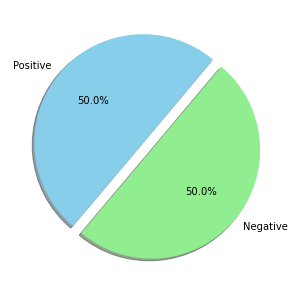

In [3]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'lightgreen']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 50,
                 explode=(0, 0.1))

In [4]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             #print(emojis)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
data['text']=data['text'].apply(preprocessor)

In [6]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

In [9]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

Positive words are as follows


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))